# Task 4 (Decision Tree Classifier)

## 1) Read the data (heart.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("C:/Users/amand/Documents/Excel/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.rename(columns={'sex': 'gender'}, inplace=True)

In [4]:
columns_to_drop = ['fbs']
df.drop(columns_to_drop, axis=1, inplace=True)

## 2) Data Preprocessing

In [5]:
min_max= MinMaxScaler()
for column in df.columns:
    if df[column].dtype != 'object':
        df[column]=min_max.fit_transform(df[[column]])
df.head(5)

,age,gender,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [6]:
df.isnull().sum()

age         0
gender      0
cp          0
trtbps      0
chol        0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


## 3) Splitting dataset


In [7]:
X=df.drop(['output'],axis='columns')
Y=df['output']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.30)

In [9]:
x_train

,age,gender,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall
139,0.729167,1.0,0.000000,0.320755,0.312785,0.5,0.259542,1.0,0.032258,0.5,0.25,1.000000
84,0.270833,0.0,0.000000,0.075472,0.317352,0.0,0.389313,0.0,0.096774,0.5,0.00,0.666667
293,0.791667,1.0,0.666667,0.547170,0.196347,0.0,0.603053,0.0,0.129032,0.5,0.00,1.000000
159,0.562500,1.0,0.333333,0.339623,0.216895,0.0,0.702290,0.0,0.000000,1.0,0.00,1.000000
5,0.583333,1.0,0.000000,0.433962,0.150685,0.5,0.587786,0.0,0.064516,0.5,0.00,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.291667,1.0,0.000000,0.150943,0.194064,0.5,0.687023,0.0,0.000000,1.0,0.00,1.000000
3,0.562500,1.0,0.333333,0.245283,0.251142,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
217,0.708333,1.0,0.000000,0.339623,0.465753,0.0,0.465649,1.0,0.290323,1.0,0.75,1.000000
39,0.750000,0.0,0.666667,0.622642,0.534247,0.0,0.610687,0.0,0.129032,1.0,0.00,0.666667


## 4) Train the algorithm(Using Gini index & Entropy)

In [10]:
clf=DecisionTreeClassifier() 
clf=clf.fit(x_train,y_train) 
y_pred=clf.predict(x_test) 
 
clf1=DecisionTreeClassifier(criterion='entropy') 
clf1=clf1.fit(x_train,y_train) 
ypred=clf1.predict(x_test) 


## 5) Display Confusion metric and Classification report


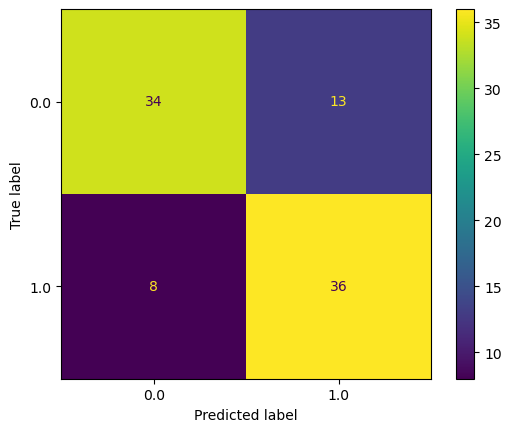

Accuracy score on testing data(using entropy): 0.7802197802197802
Accuracy score on testing data(using gini index):  0.7692307692307693
Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        47
         1.0       0.73      0.82      0.77        44

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [11]:
cm=confusion_matrix(y_test,y_pred, labels=clf.classes_) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_) 
disp.plot()
plt.show() 
 
print("Accuracy score on testing data(using entropy):",accuracy_score(y_test,ypred))
print("Accuracy score on testing data(using gini index): ",accuracy_score(y_test,y_pred)) 
 
print("Classification Report") 
print(classification_report(y_test,y_pred)) 


## 6) Display Tree for both the models(Using Giniindex & Entropy)

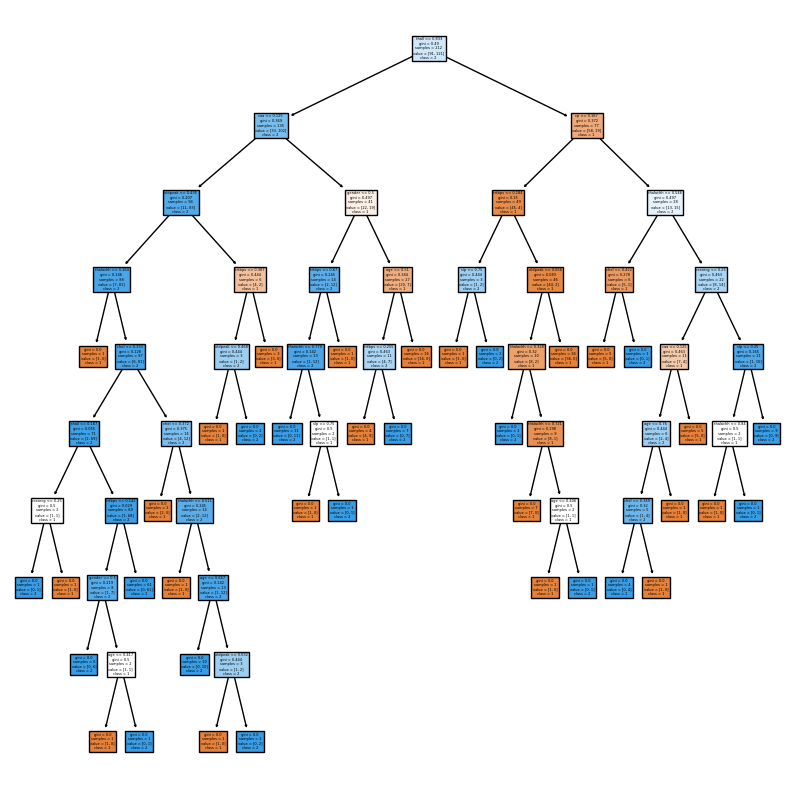

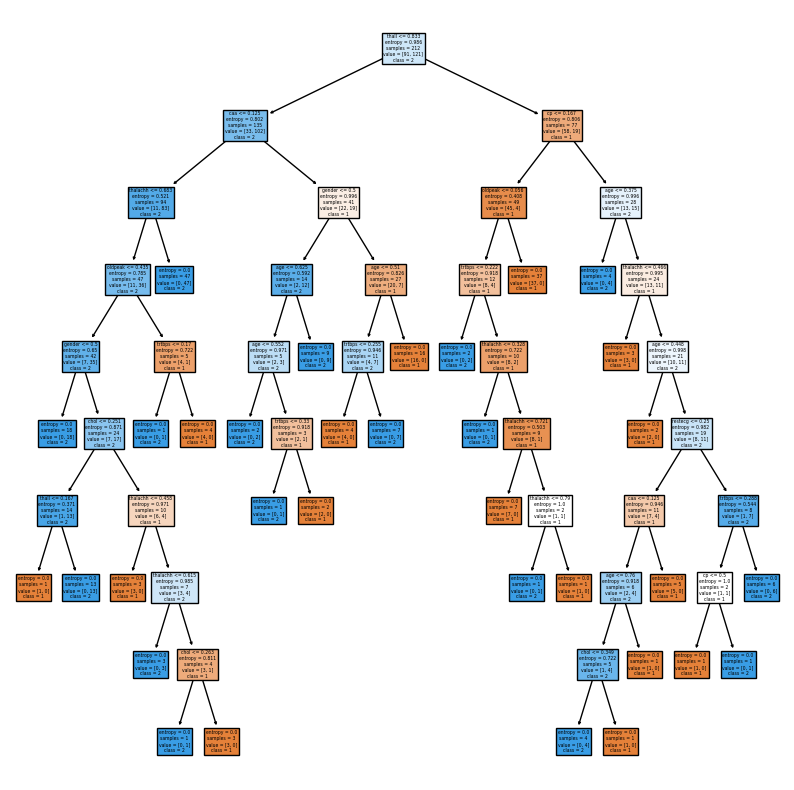

In [12]:
target_names=['1','2','3','5','6','7'] 
feature_cols= X.columns
fig=plt.figure(figsize=(10,10)) 
z=tree.plot_tree(clf,feature_names=feature_cols,class_names=target_names,filled=True)
plt.show() 
 
target_names=['1','2','3','5','6','7']
feature_cols= X.columns
fig=plt.figure(figsize=(10,10)) 
z=tree.plot_tree(clf1,feature_names=feature_cols,class_names=target_names,filled=True)
plt.show() 
